In [3]:
# imports

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from scipy import stats

import wrangle as w
import prepare as p
import explore as e

# Exercises

#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.



In [4]:
df = w.wrangle_zillow()
df

,year,beds,baths,area,prop_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
6,1950,3,1.0,1244,169471,2532.88,LA
7,1950,3,2.0,1300,233266,3110.99,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [5]:
train, val, test = w.split_zillow(df)
train

,year,beds,baths,area,prop_value,prop_tax,county
558946,1953,2,1.0,989,141500,2446.95,LA
156655,1972,4,2.0,2054,555982,6570.12,LA
2055932,1945,2,1.0,774,237093,2945.65,LA
687070,1958,3,2.0,1570,431696,5390.83,LA
1496477,2007,4,3.0,1919,598904,6709.22,Orange
...,...,...,...,...,...,...,...
723557,1955,5,2.0,1811,490263,1244.70,LA
587409,1971,3,2.0,1273,676152,6965.32,Orange
1801850,1939,2,1.0,1153,173237,2260.89,LA
352380,1947,3,1.0,1138,220705,3130.73,LA


#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [4]:
def plot_var_pairs(df,target):
    for i in df.drop(columns=target).columns[:-1]:
        sns.lmplot(x=i,y=target,data=df,line_kws={'color':'orange'})
        plt.ylim(0,2_000_000)
        plt.show()

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [5]:
def plot_cat_n_cont_vars(df,cat,cont):
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    sns.boxenplot(x=cat, y=cont, data=df)
    plt.subplot(1,3,2)
    sns.boxplot(x=cat, y=cont, data=df)
    plt.subplot(1,3,3)
    sns.violinplot(x=cat, y=cont, data=df)
    plt.show()

#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



In [6]:
# saved

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



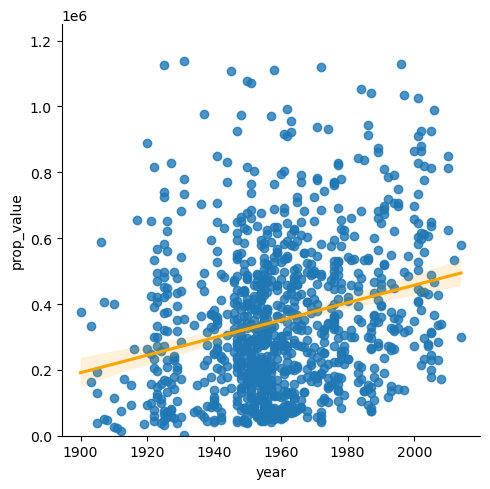

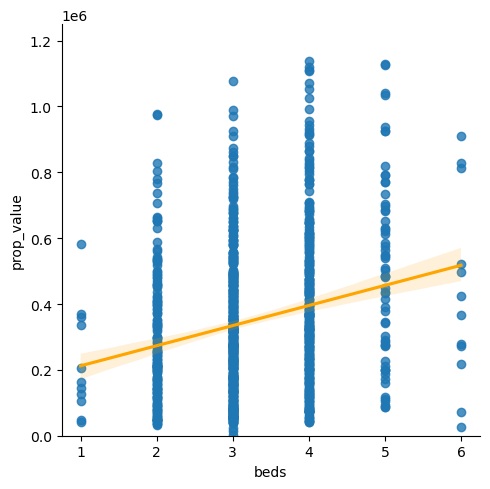

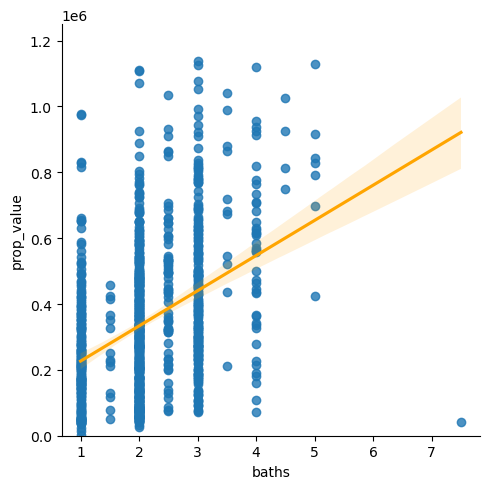

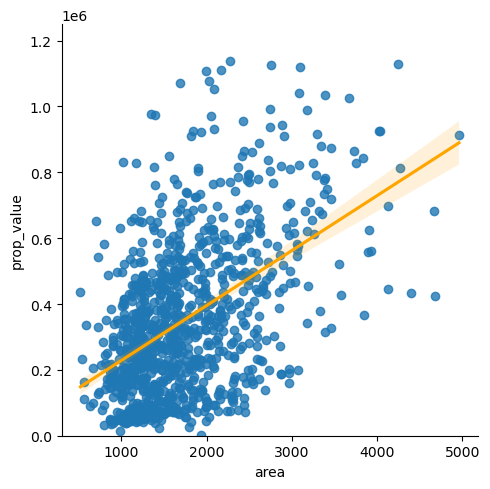

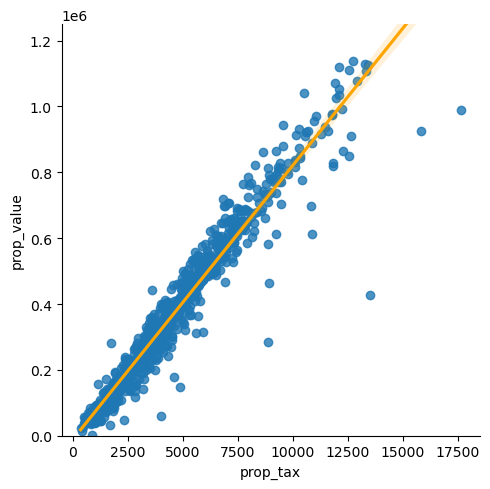

In [7]:
e.plot_var_pairs(train.sample(1000),'prop_value')

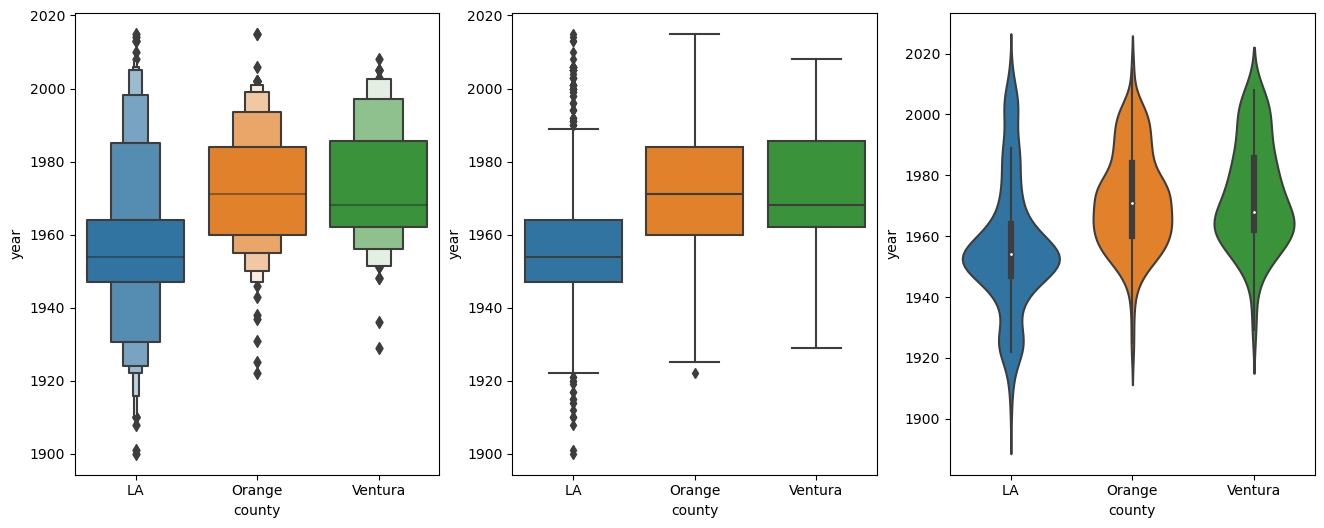

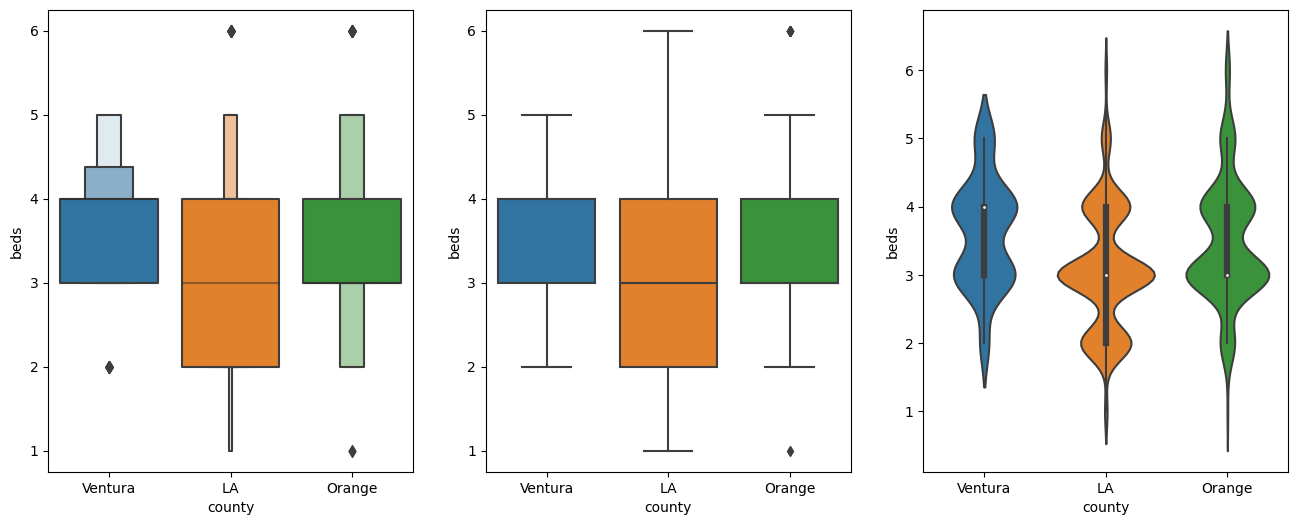

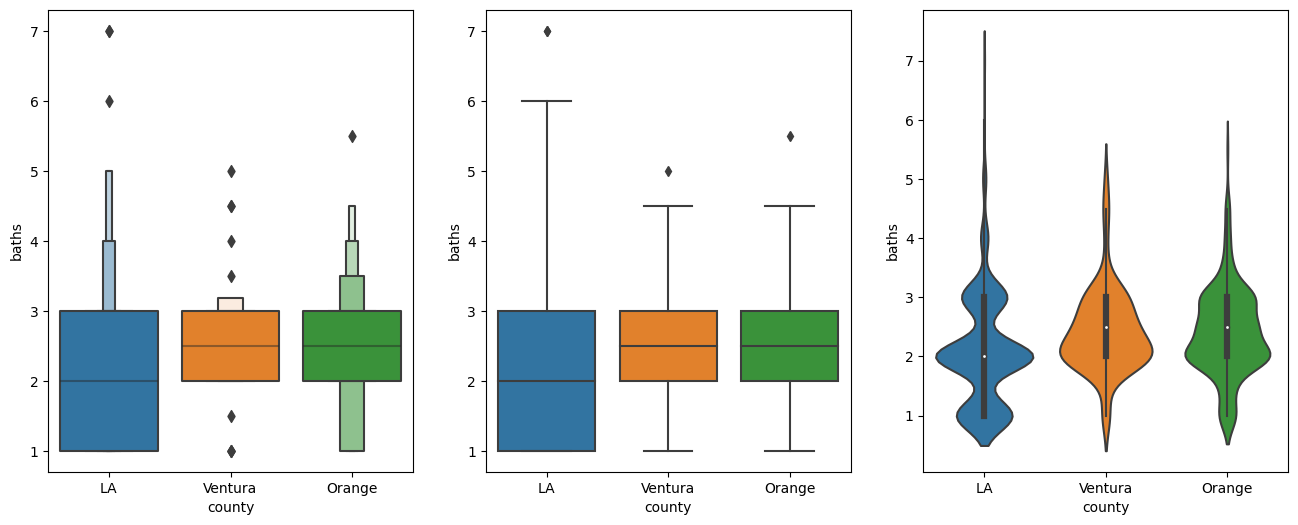

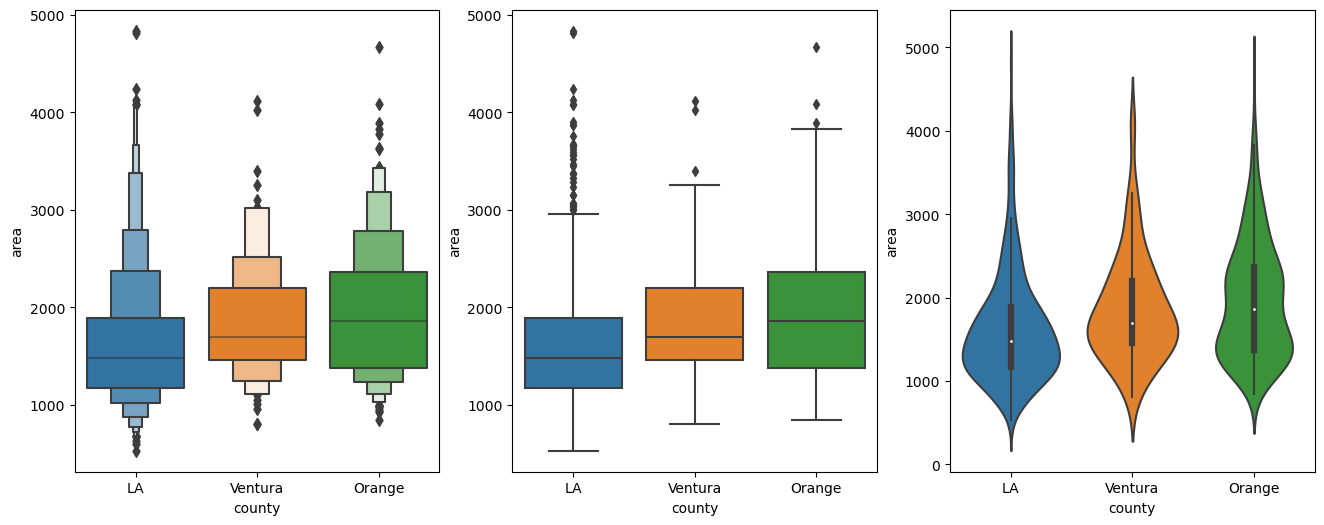

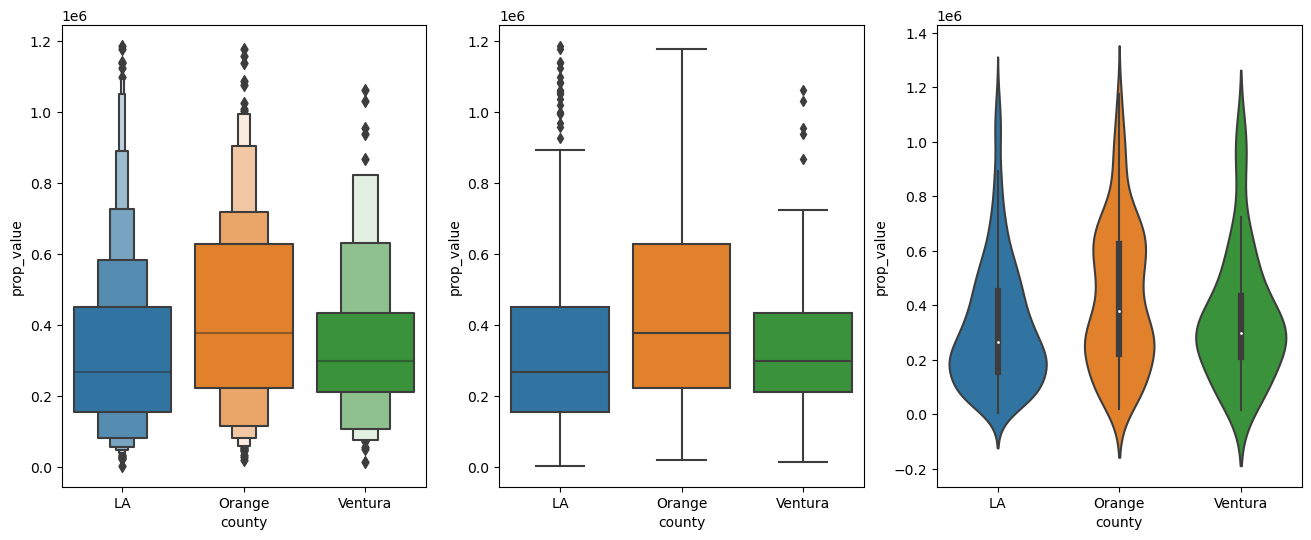

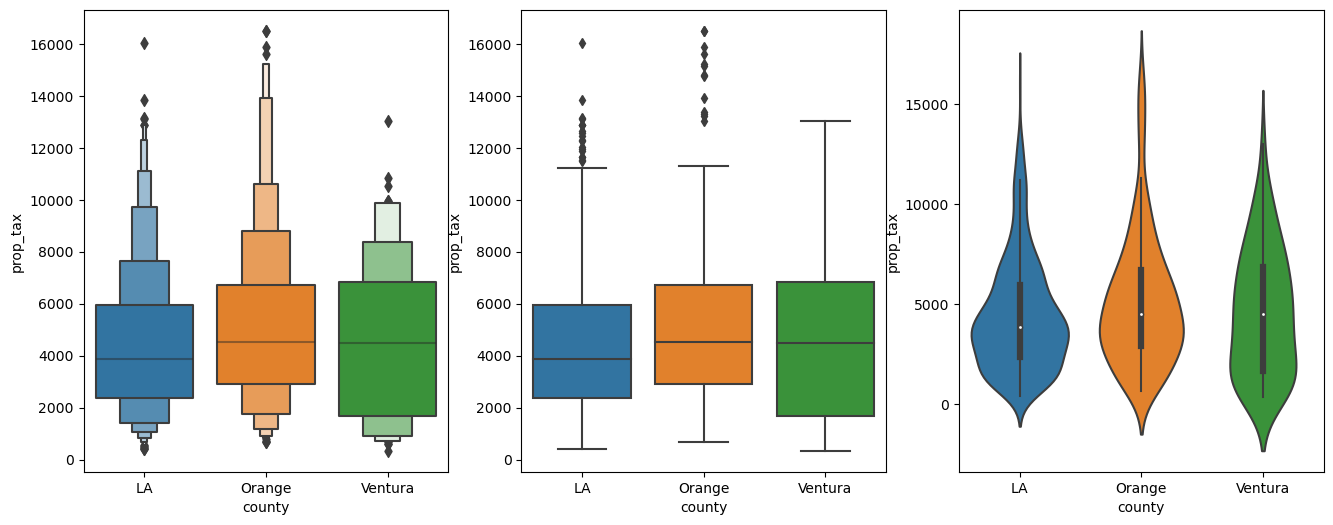

In [8]:
for c in ['year','beds','baths','area','prop_value','prop_tax']:
    e.plot_cat_n_cont_vars(df=train.sample(1000),cat='county',cont=c)

#### 7. Come up with some initial hypotheses based on your goal of predicting property value.



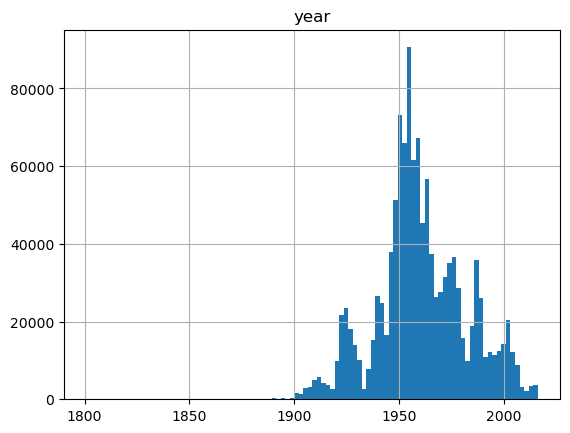

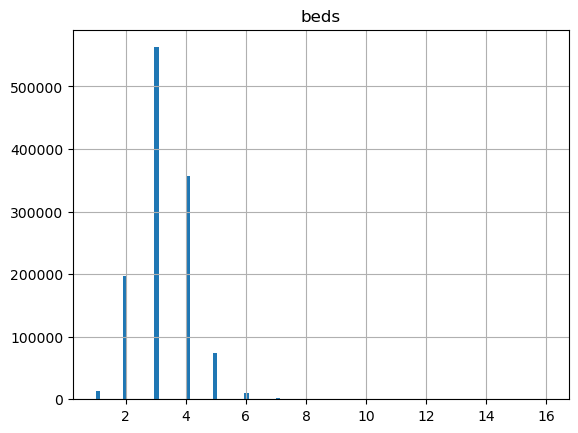

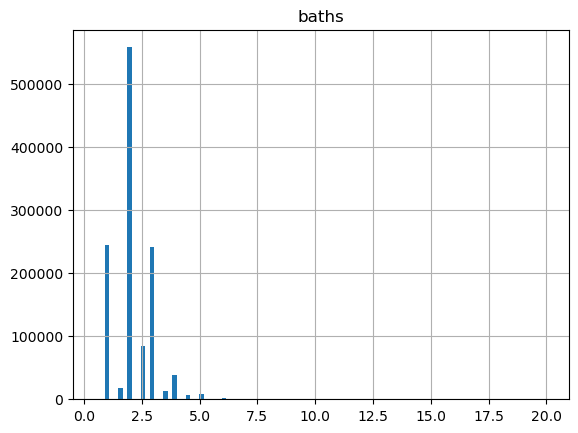

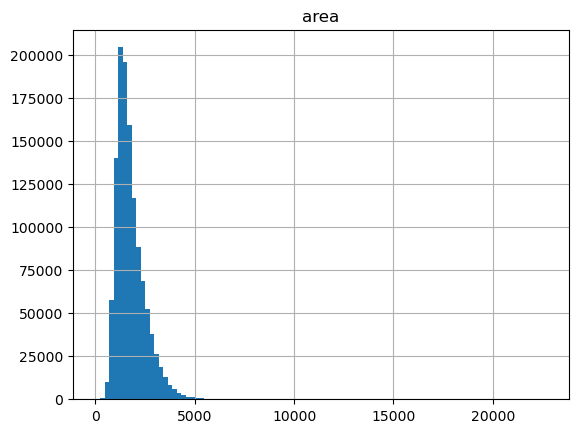

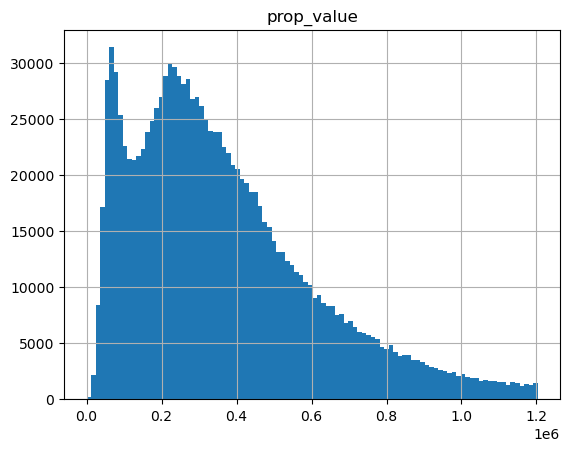

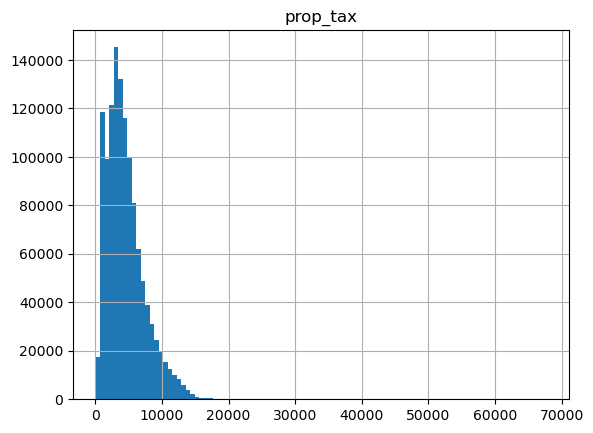

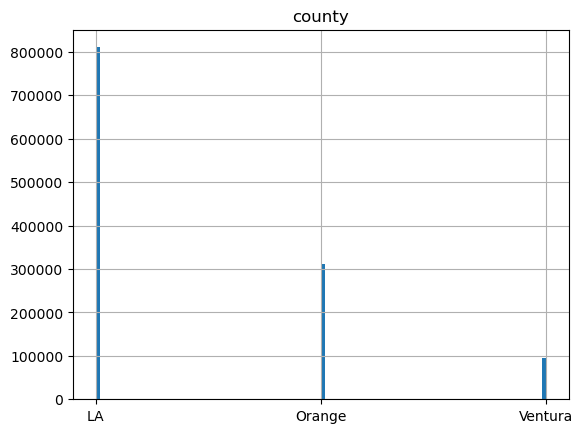

In [9]:
cols = ['year','beds','baths','area','prop_value','prop_tax','county']
for col in cols:
    plt.title(col)
    train[col].hist(bins=100)
    plt.show()

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1216851.0,1960.314413,21.524092,1801.00,1949.00,1958.0,1974.000,2016.00
beds,1216851.0,3.266409,0.886071,1.00,3.00,3.0,4.000,16.00
baths,1216851.0,2.147323,0.830599,0.50,2.00,2.0,3.000,20.00
area,1216851.0,1754.216616,723.489311,1.00,1244.00,1590.0,2108.000,22702.00
prop_value,1216851.0,363861.621551,243160.358290,22.00,182271.00,313419.0,492326.000,1202942.00
prop_tax,1216851.0,4513.391610,2842.293261,20.24,2463.11,3945.9,5945.195,67715.45


In [11]:
# most years 1900+
# not many more than 6 beds
# not many more than 5.5 baths
# not many more than 5k sqft
# not many prop_tax more than 200k
# prop_tax and area similar dist shapes
# most homes in LA
# LA homes more diverse
# Orange more value and tax on avg, then Ventura, then LA

In [12]:
# is prop_value rel to prop_tax
# is prop_value rel to area
    # what about prop_tax and area
# is prop_value rel to year
# how does prop_value compare between counties
    # area and counties
    # area and prop_tax
    # area and year

#### 8. Visualize all combinations of variables in some way.



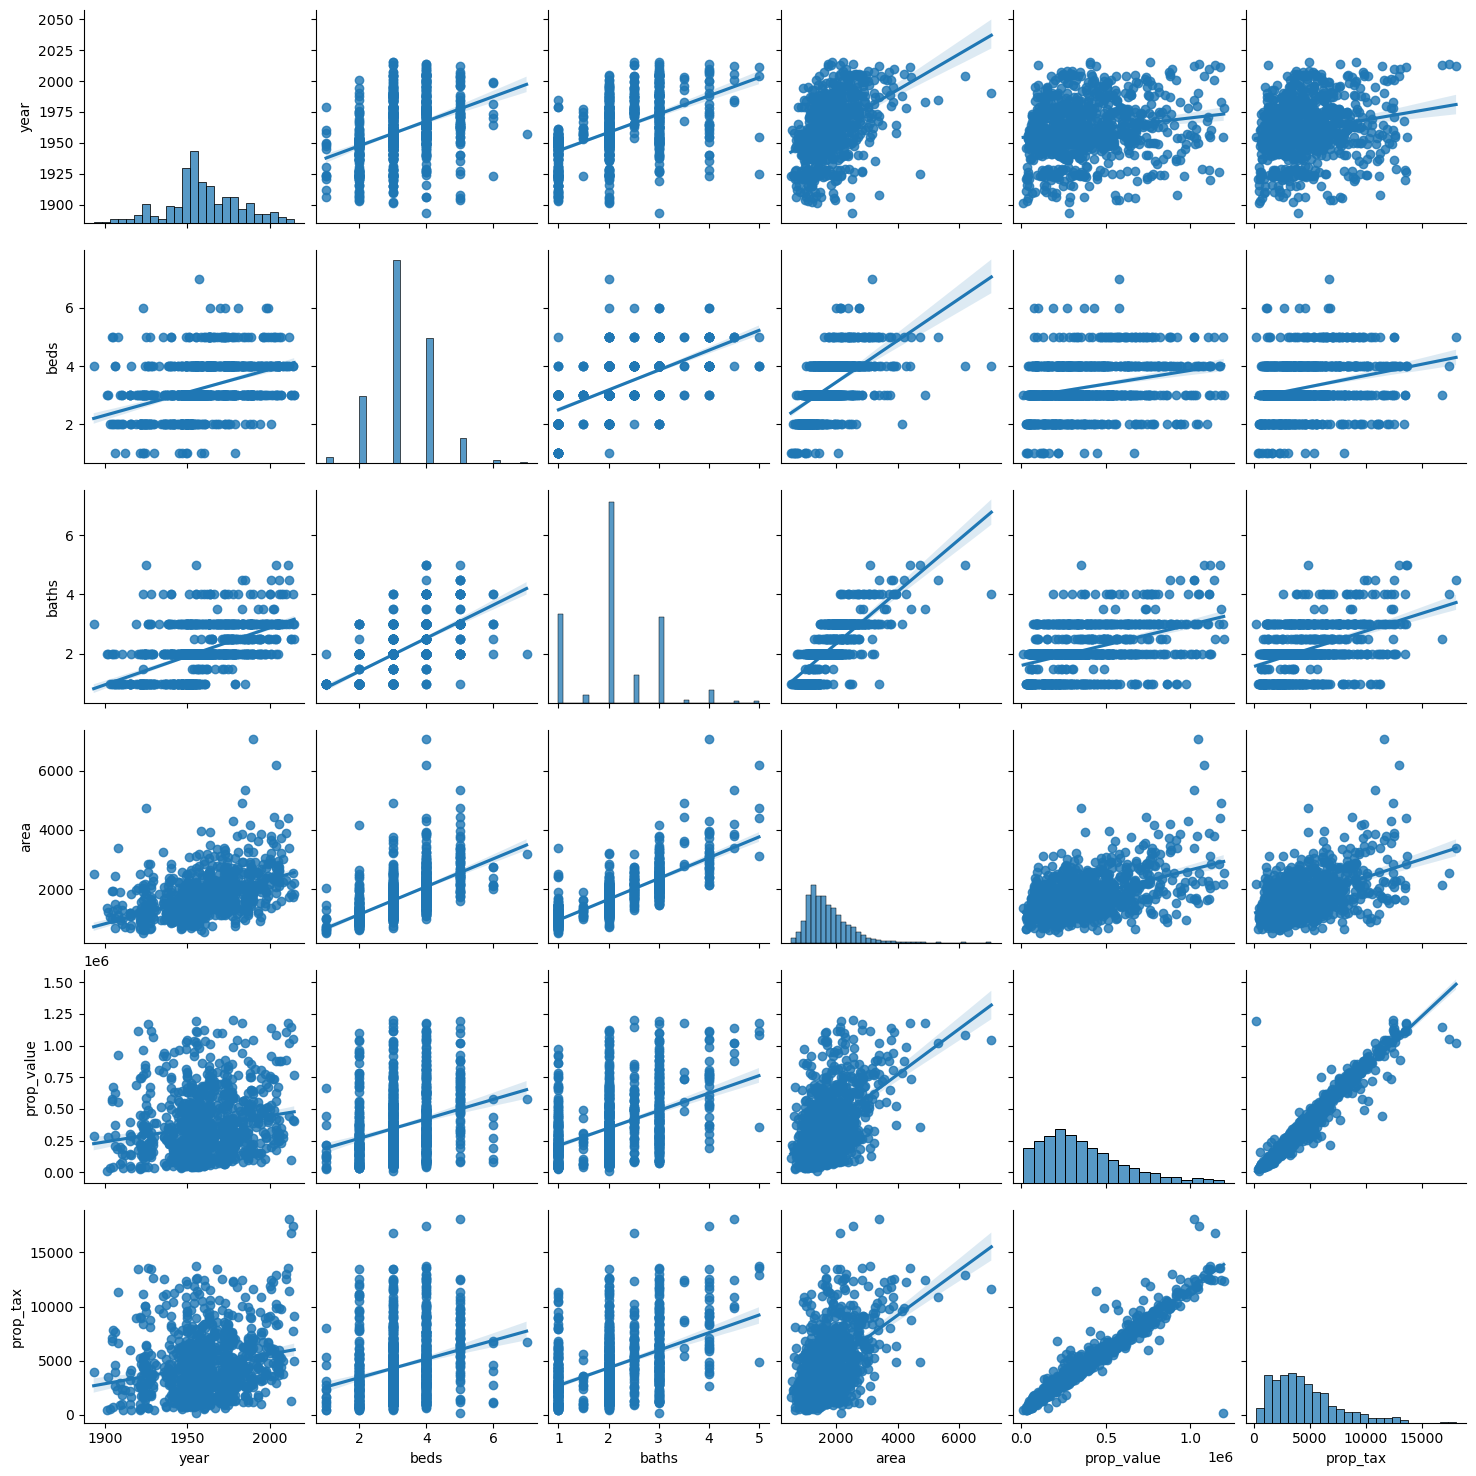

In [12]:
sns.pairplot(data=train.sample(1000),kind='reg')
plt.show()

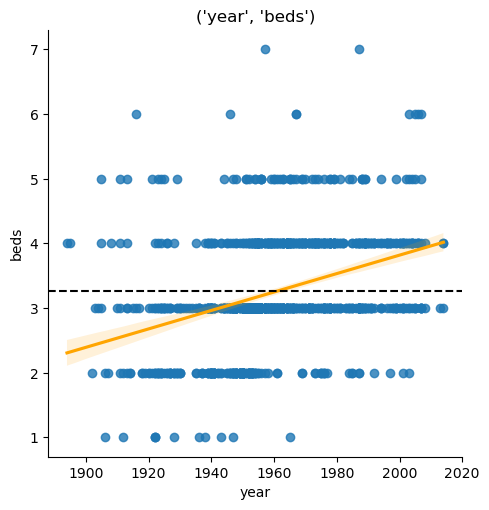

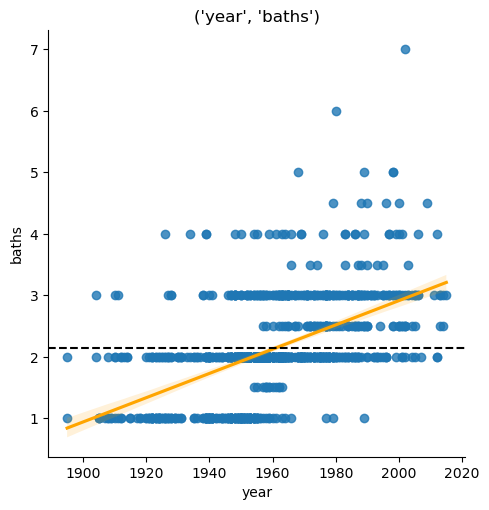

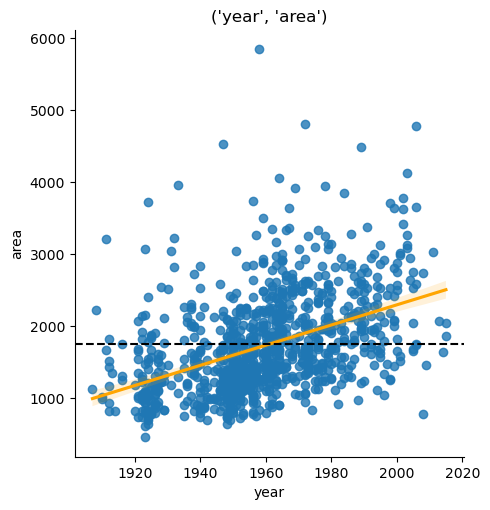

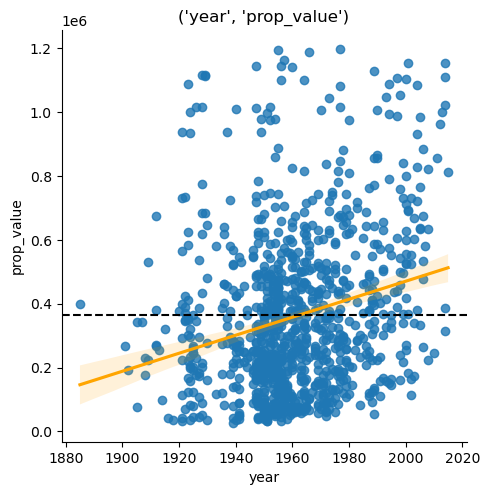

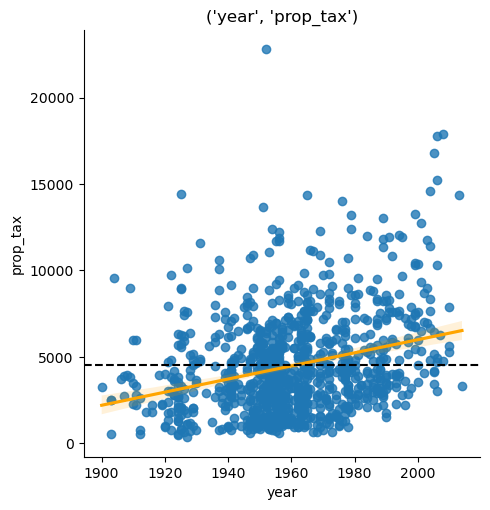

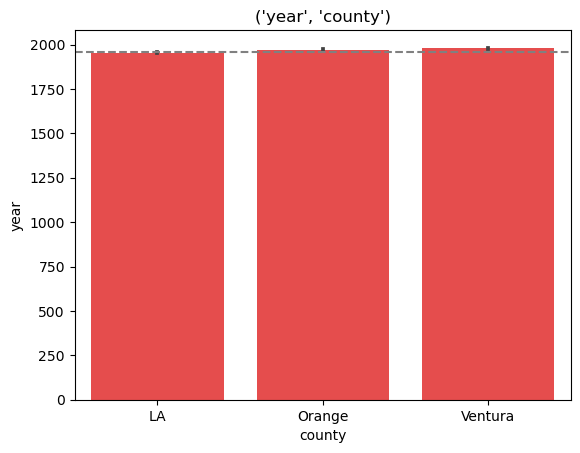

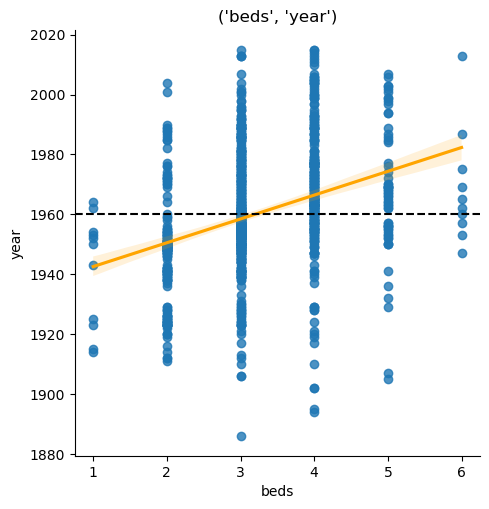

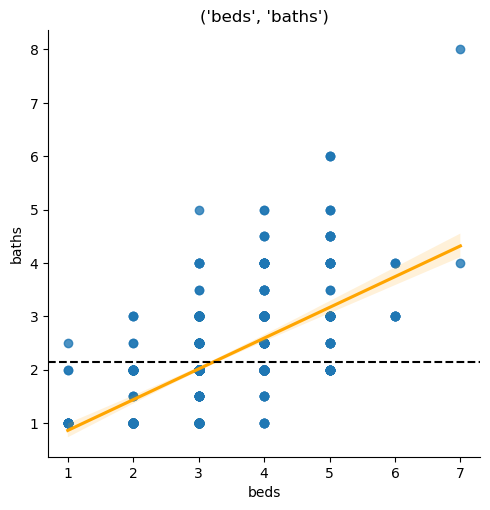

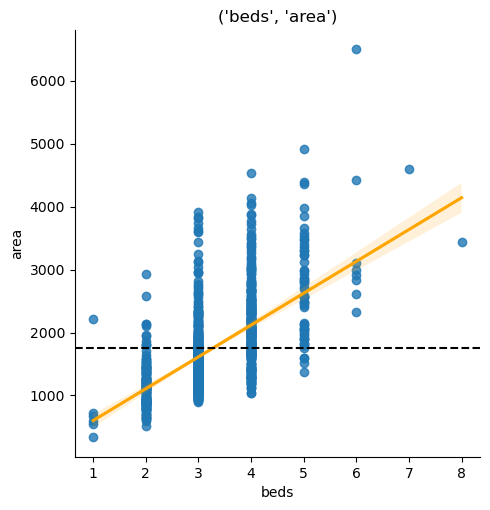

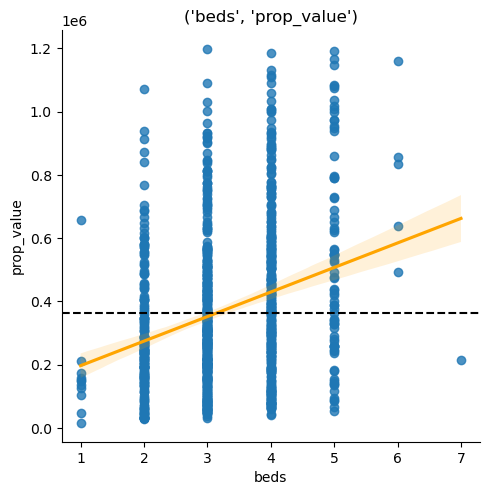

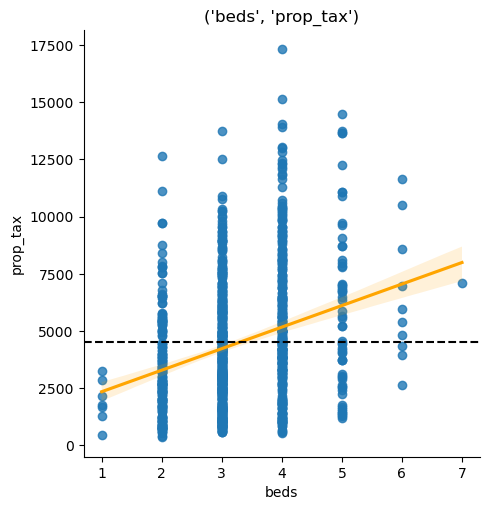

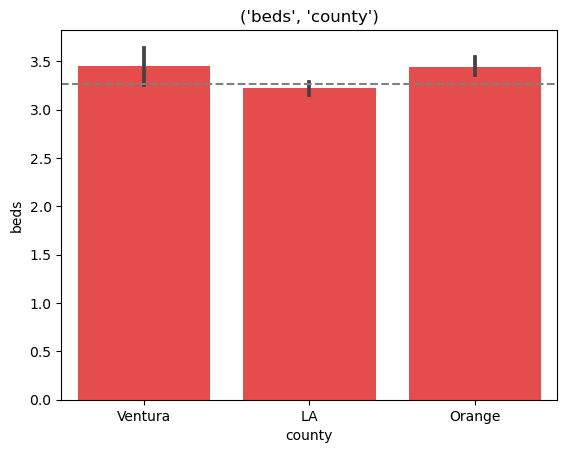

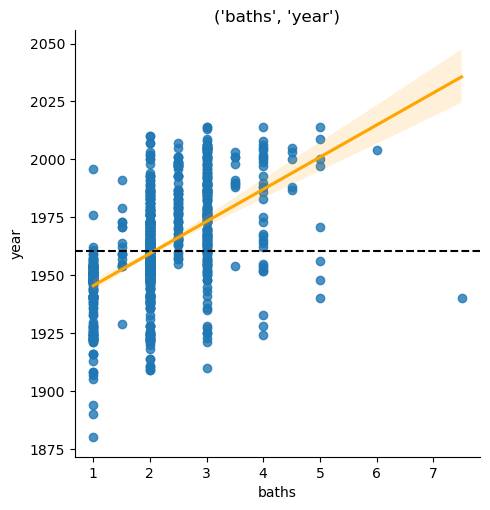

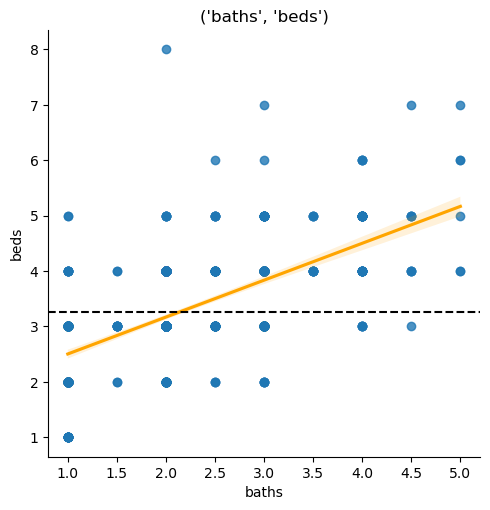

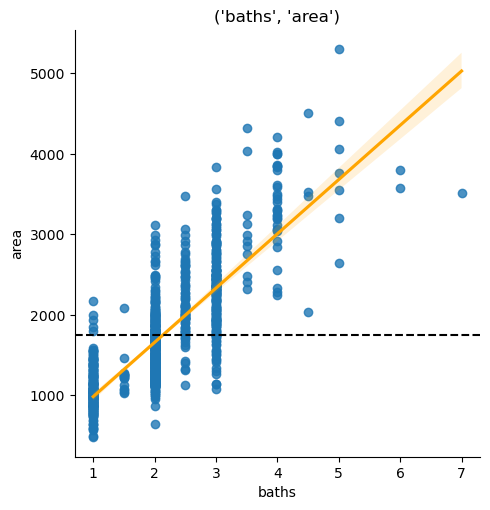

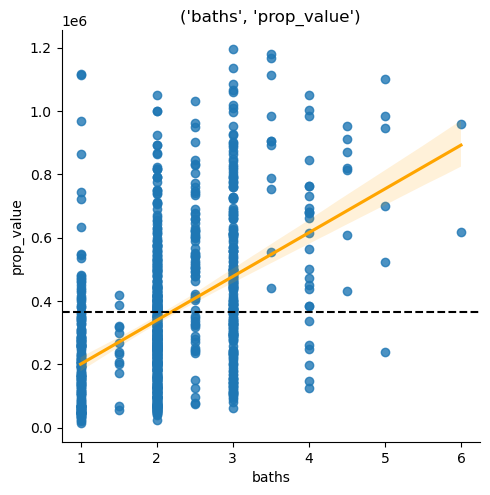

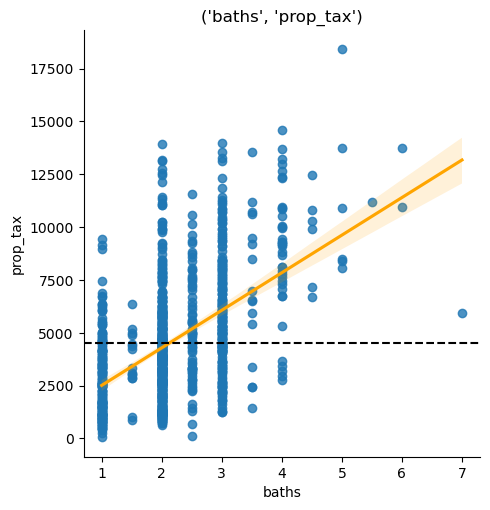

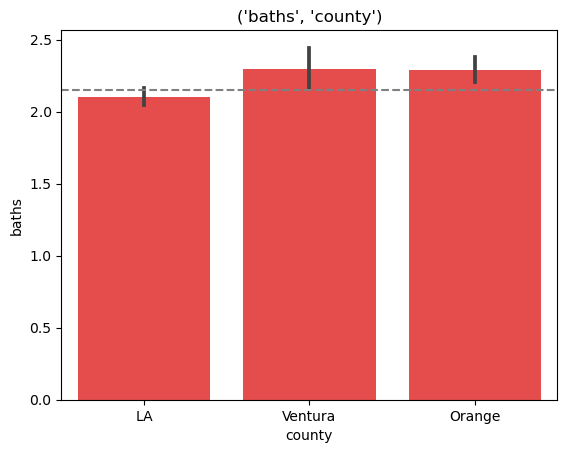

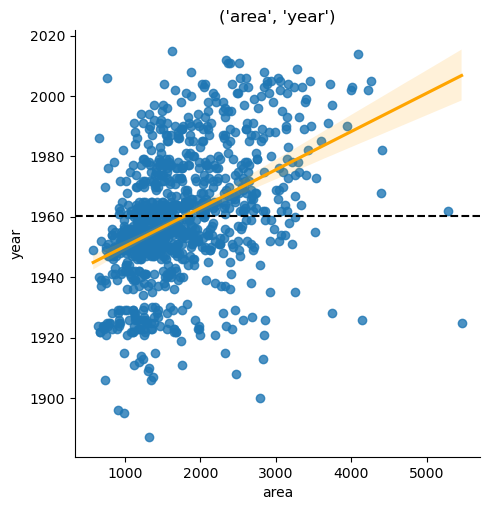

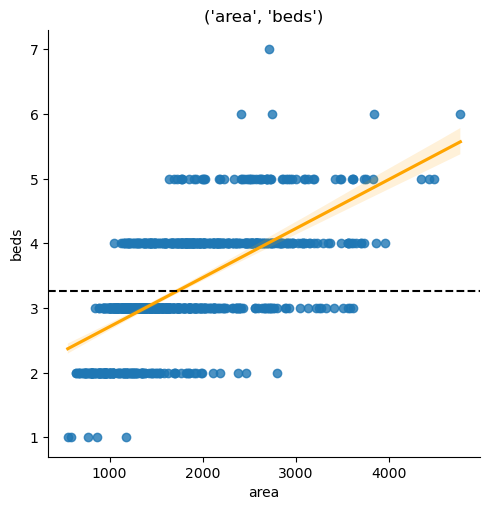

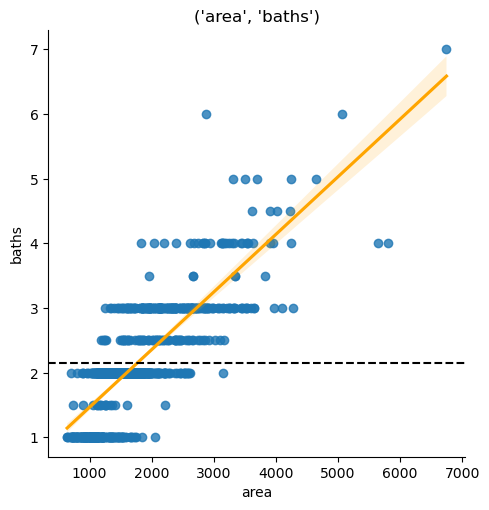

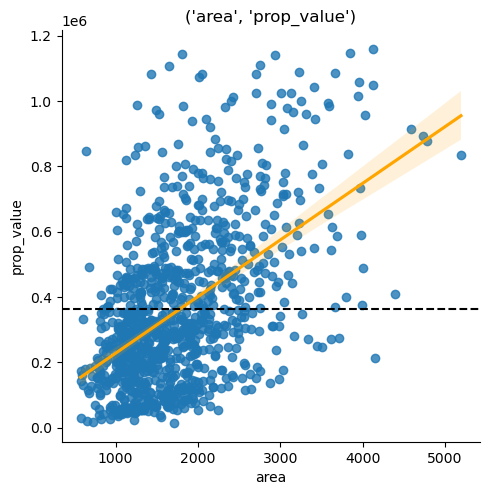

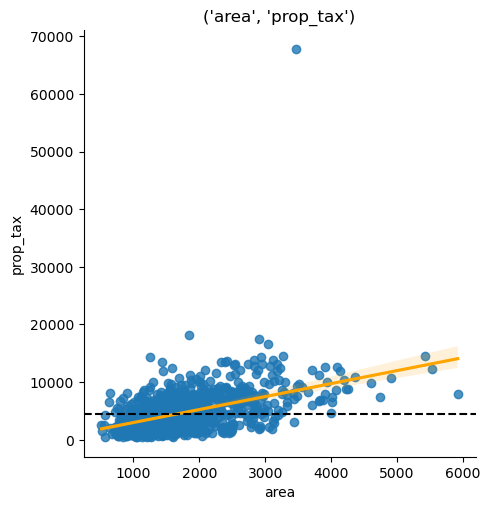

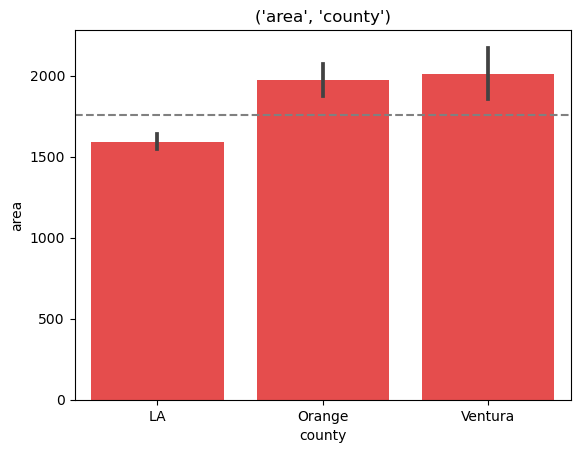

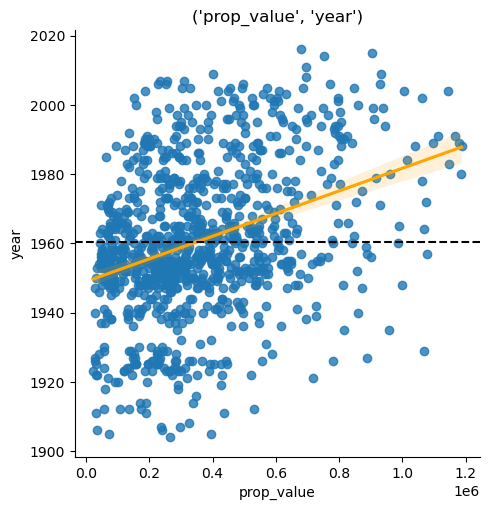

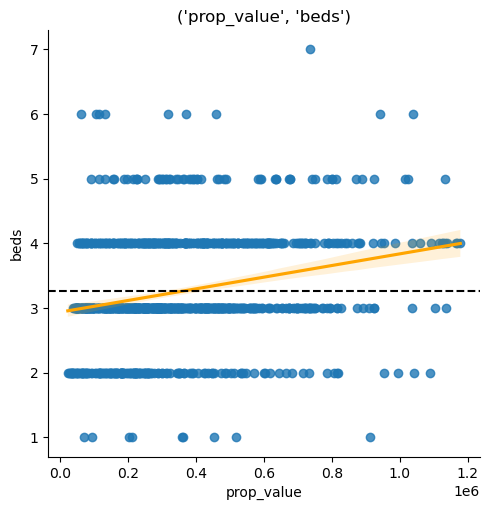

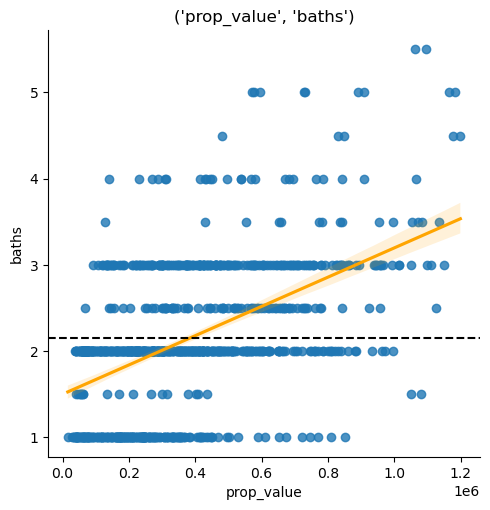

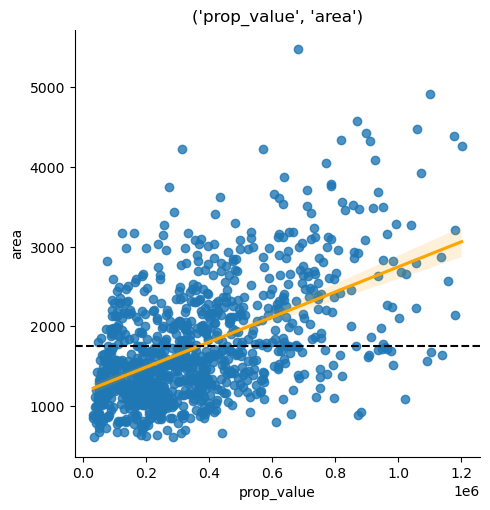

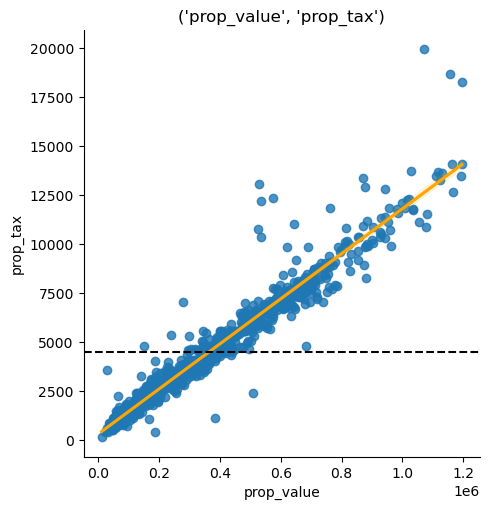

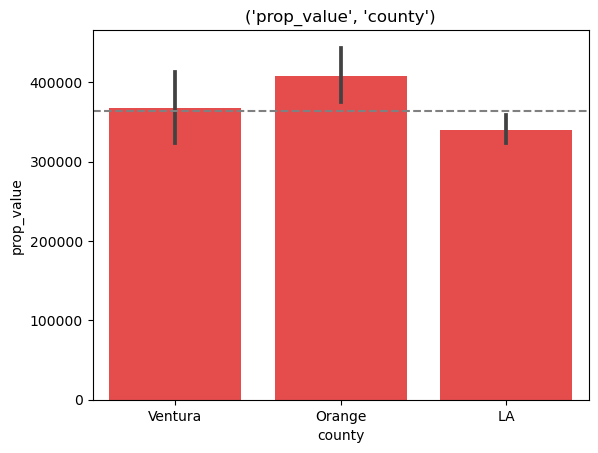

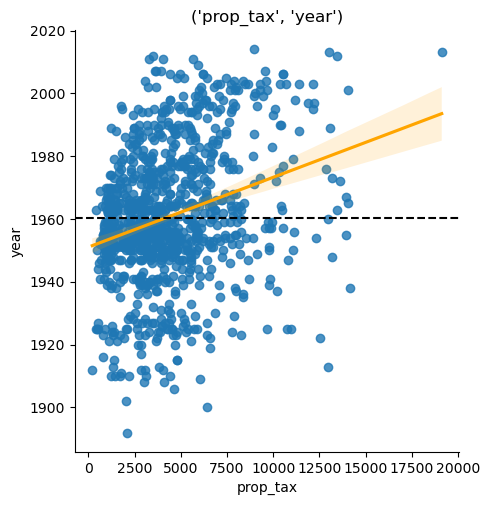

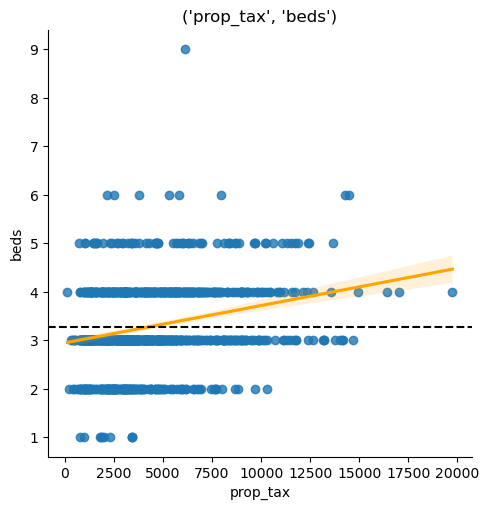

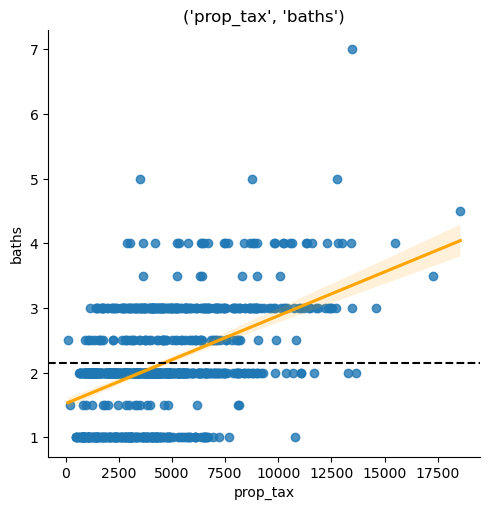

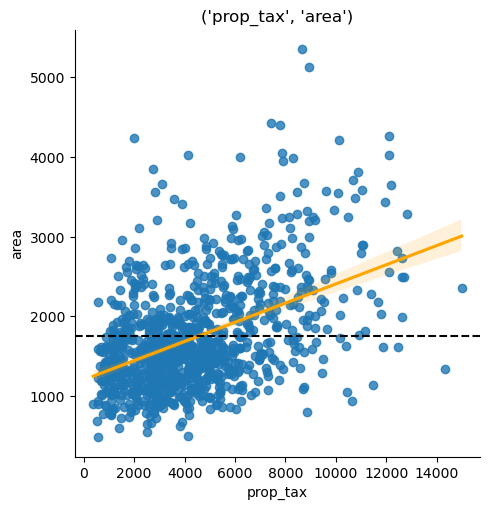

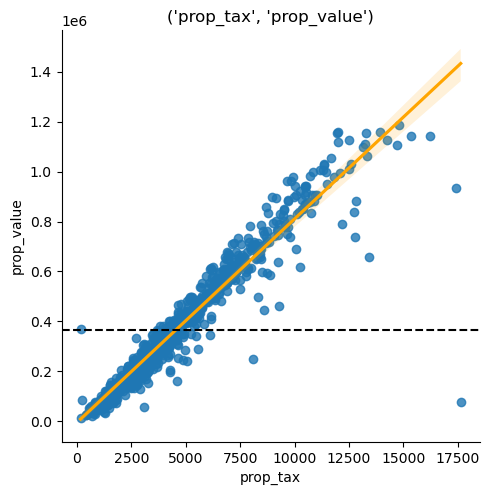

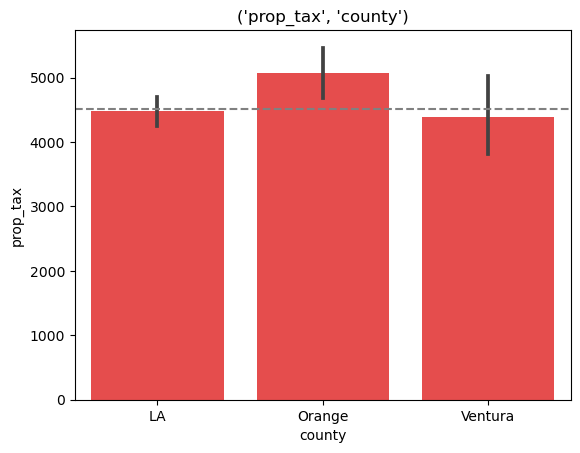

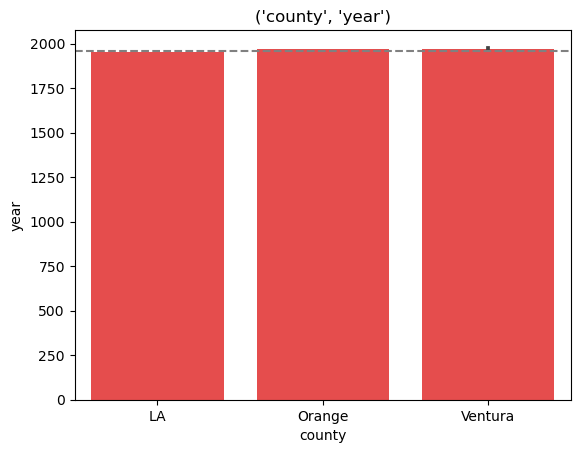

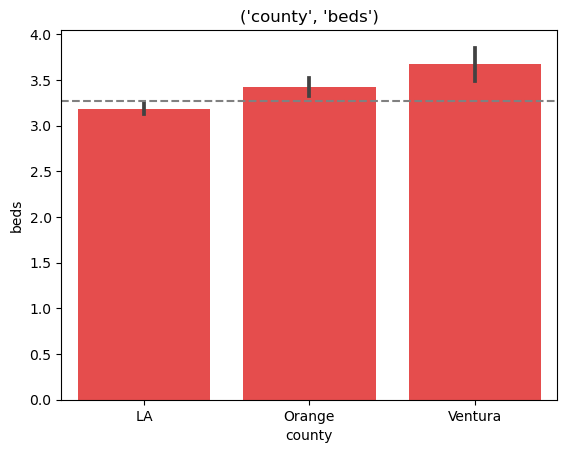

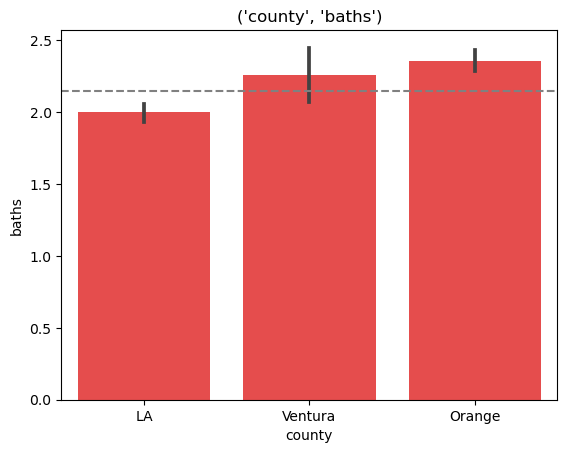

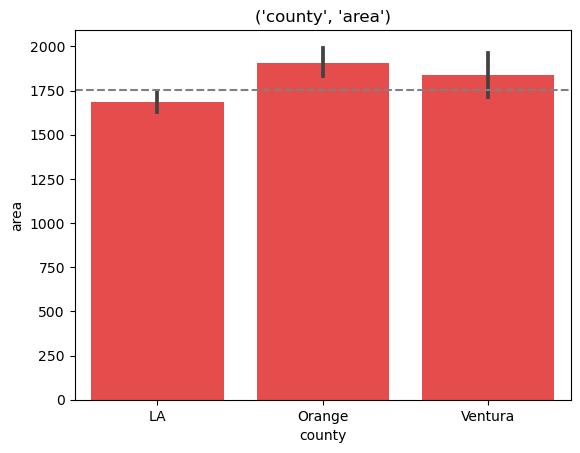

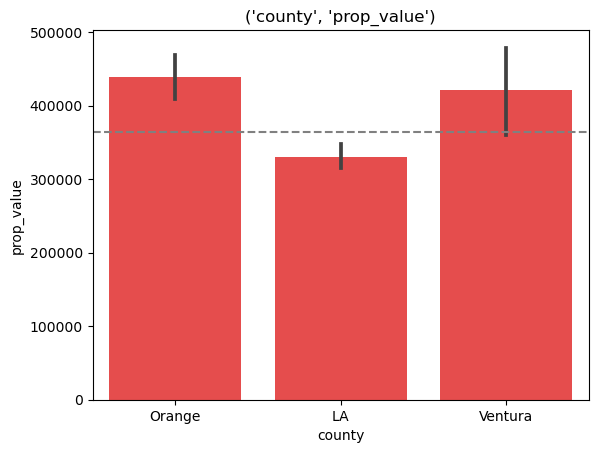

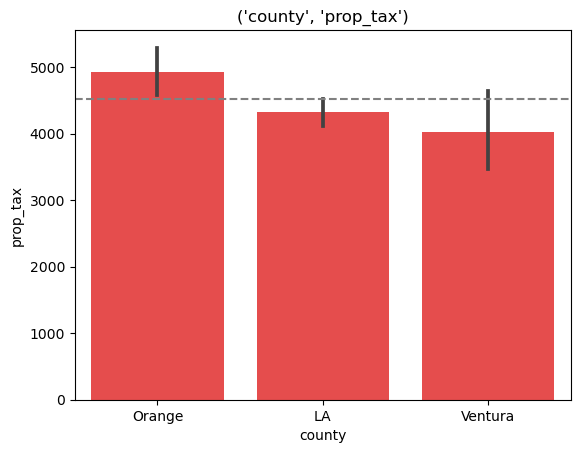

In [13]:
cols = ['year','beds','baths','area','prop_value','prop_tax','county']

for col in itertools.permutations(cols,2):
    # cat
    if col[1] == 'county':
        sns.barplot(x=col[1], y=col[0], data=train.sample(1000), alpha=.8, color='red')
        overall_rate = train[col[0]].mean()
        plt.axhline(overall_rate, ls='--', color='gray')
    elif col[0] == 'county':
        sns.barplot(x=col[0], y=col[1], data=train.sample(1000), alpha=.8, color='red')
        overall_rate = train[col[1]].mean()
        plt.axhline(overall_rate, ls='--', color='gray')
    else:
        average = train[col[1]].mean()
        sns.lmplot(x=col[0], y=col[1], data=train.sample(1000), line_kws={'color':'orange'})
        plt.axhline(average, ls='--', color='black')
    plt.title(col)
    plt.show()

#### 9. Run the appropriate statistical tests where needed.



In [6]:
# def compare_means(train, target, quant_var, alt_hyp='two-sided', pop='all'):
#     if pop == 'all':
#         stat,p = stats.mannwhitneyu(train[target], train[quant_var], alternative=alt_hyp)
#     else:
#         x = train[train[target]=='LA'][quant_var]
#         y = train[train[target]=='Orange'][quant_var]
#         z = train[train[target]=='Ventura'][quant_var]
#         stat,p = stats.mannwhitneyu(x, y, alternative=alt_hyp)
#     print(f"Mann-Whitney Test: {target} and {quant_var}\n", f'stat = {stat}, p = {p}')

def pear(train, x, y, alt_hyp='two-sided'):
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')

In [7]:
cols = ['year','beds','baths','area','prop_value','prop_tax']

for col in itertools.permutations(cols,2):
    # cont & cont
    pear(train,col[0],col[1])

Spearman's R: year and beds
 r = 0.42549270669984557, p = 0.0
Spearman's R: year and baths
 r = 0.5774485091283038, p = 0.0
Spearman's R: year and area
 r = 0.5121339131370184, p = 0.0
Spearman's R: year and prop_value
 r = 0.27823848153849196, p = 0.0
Spearman's R: year and prop_tax
 r = 0.2762885694259727, p = 0.0
Spearman's R: beds and year
 r = 0.42549270669984557, p = 0.0
Spearman's R: beds and baths
 r = 0.6177246104884808, p = 0.0
Spearman's R: beds and area
 r = 0.6437553909437781, p = 0.0
Spearman's R: beds and prop_value
 r = 0.25451198674408376, p = 0.0
Spearman's R: beds and prop_tax
 r = 0.25633485535204364, p = 0.0
Spearman's R: baths and year
 r = 0.5774485091283038, p = 0.0
Spearman's R: baths and beds
 r = 0.6177246104884808, p = 0.0
Spearman's R: baths and area
 r = 0.8093421475672931, p = 0.0
Spearman's R: baths and prop_value
 r = 0.4228974120501415, p = 0.0
Spearman's R: baths and prop_tax
 r = 0.42238600130308174, p = 0.0
Spearman's R: area and year
 r = 0.5121339

#### 10. What independent variables are correlated with the dependent variable, home value?



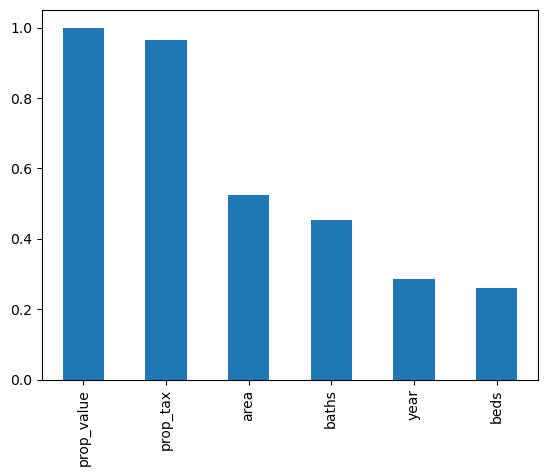

In [ ]:
train.corr()['prop_value'].sort_values(ascending = False).plot(kind='bar')
plt.show()

#### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



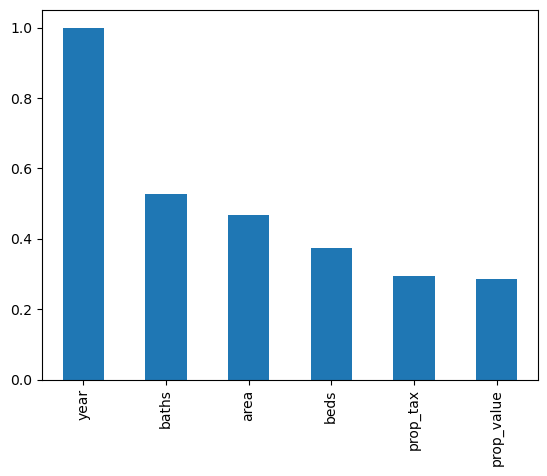

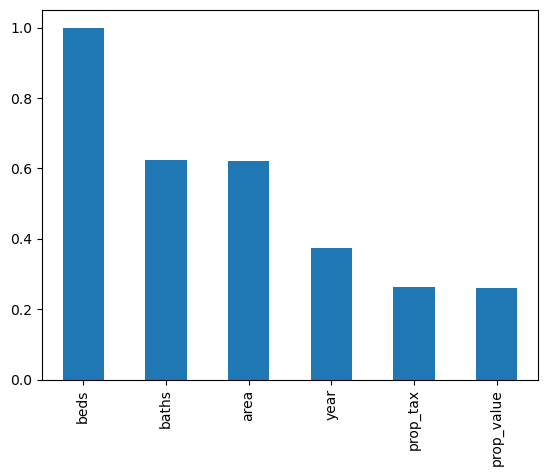

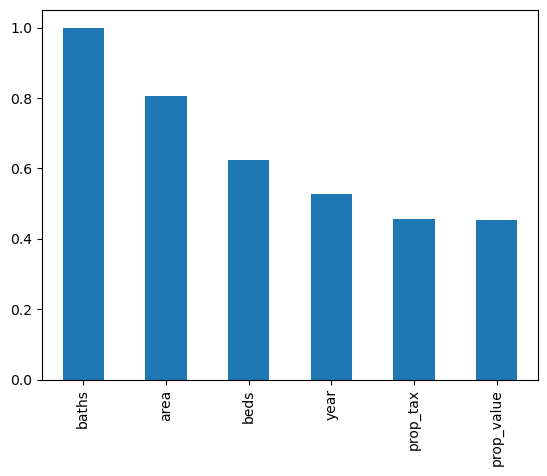

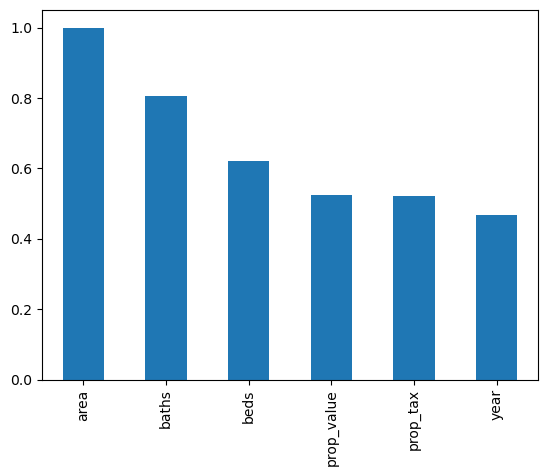

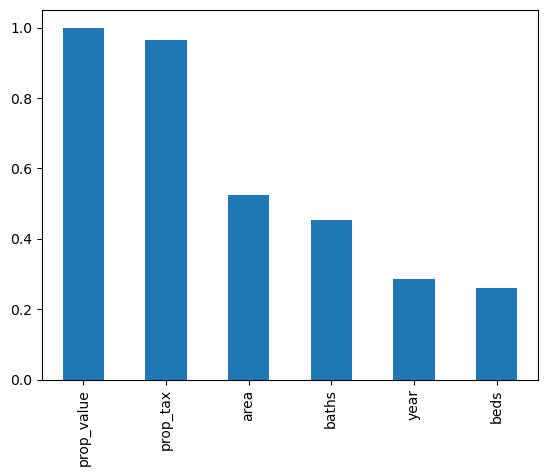

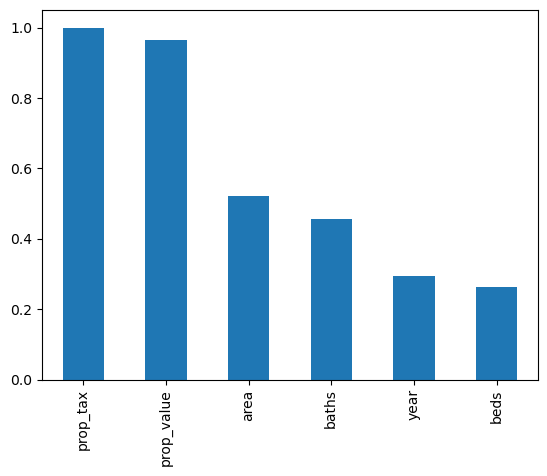

In [9]:
cols = ['year','beds','baths','area','prop_value','prop_tax']
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.show()

#### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.



In [ ]:
# bath and area are more correlated than bath and beds
# most years 1900+
# not many more than 6 beds
# not many more than 5.5 baths
# not many more than 5k sqft
# not many prop_tax more than 200k
# prop_tax and area similar dist shapes
# most homes in LA
# LA homes more diverse
# Orange more value and tax on avg, then Ventura, then LA

#### 13. Explore your dataset with any other visualizations you think will be helpful.



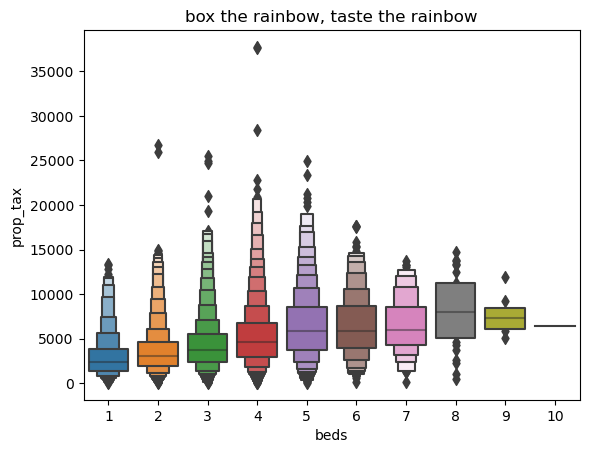

In [110]:
sns.boxenplot(data=train.sample(100000),x='beds',y='prop_tax',scale='area')
plt.title('box the rainbow, taste the rainbow')
plt.show()